## Test Networks Distribution

In this notebook, we test different distributions for the network and dataset proposed in the notebook: `04-spiral_classification`. We use this example because it is toy network very easy to understand.

## Imports and configuration

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [2]:
from res.plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")

Device : cuda:0


## Generate Dataset

Define the generation parameters

In [5]:
# Intialize the seed of the randomn
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

N = 1000  # num_samples_per_class
D = 2     # dimensions
C = 3     # num_classes

Generate datapoints following spiral distribution

In [6]:
# Zero matrixes
X = torch.zeros(N * C, D).to(device)                # Matrix to the X input point
y = torch.zeros(N * C, dtype=torch.long).to(device) # Matrix to the Y output classes

# Generate points for each class
for c in range(C):
    index = 0
    
    # Generate equidistance N points from 0 t0 1
    t = torch.linspace(0, 1, N)  
    
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linspace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    # Calculate the random point to X and Y following an spiral structure
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


Plot the generated points

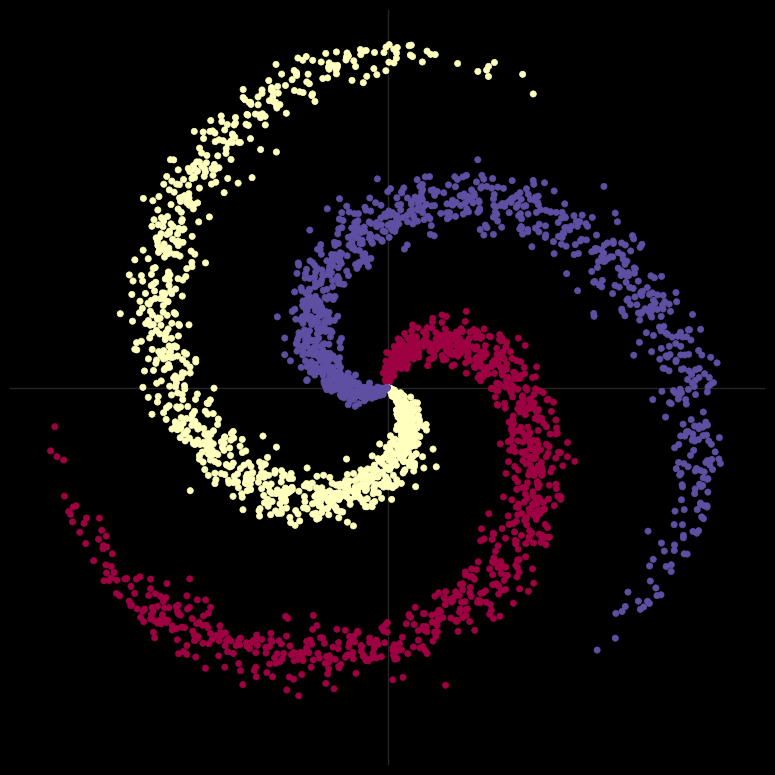

In [7]:
# visualise the data
plot_data(X, y)

## Train models

In [25]:
def train_model(X, model, criterion, optimizer, epochs=1000):
    
    # Training
    for t in range(epochs):

        # Feed forward to get the logits
        y_pred = model(X)

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        score, predicted = torch.max(y_pred, 1)
        acc = (y == predicted).sum().float() / len(y)
        print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

### Proposed model

This is the model proposed in the notebook that works ok.

In [26]:
H = 100   # num_hidden_units

In [27]:
learning_rate = 1e-3
lambda_l2 = 1e-5

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 0.166053, [ACCURACY]: 0.957


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


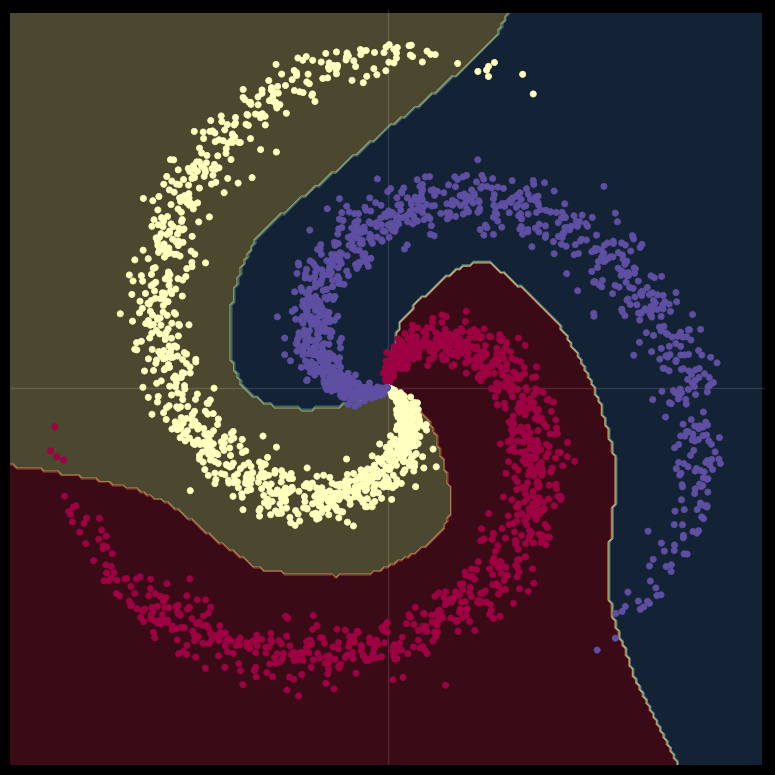

In [28]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [29]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([ -164.9281, -1519.2881,   962.7274], grad_fn=<AddBackward0>)
tensor([-1122.0718,  1526.8730,  -921.6873], grad_fn=<AddBackward0>)
tensor([-4.2378,  2.8250,  1.1030], grad_fn=<AddBackward0>)


### Rectangular

Network with a lot of layers all of them with the same number of neurons (like a long rectangle).

#### 13 Layer + ReLU

In [30]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 13 Layers
model = nn.Sequential(
    nn.Linear(D, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 0.001977, [ACCURACY]: 0.999


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): ReLU()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): ReLU()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): ReLU()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): ReLU()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): ReLU()
  (20): Linear(in_features=100, out_features=100, bias=True)
  (21): ReLU()
  (22): Linear(in_features=100, out_features=100, bias=True)
  (23): ReLU()
  (24): Linear(in_features=100, out_features=3, bias=True)
)


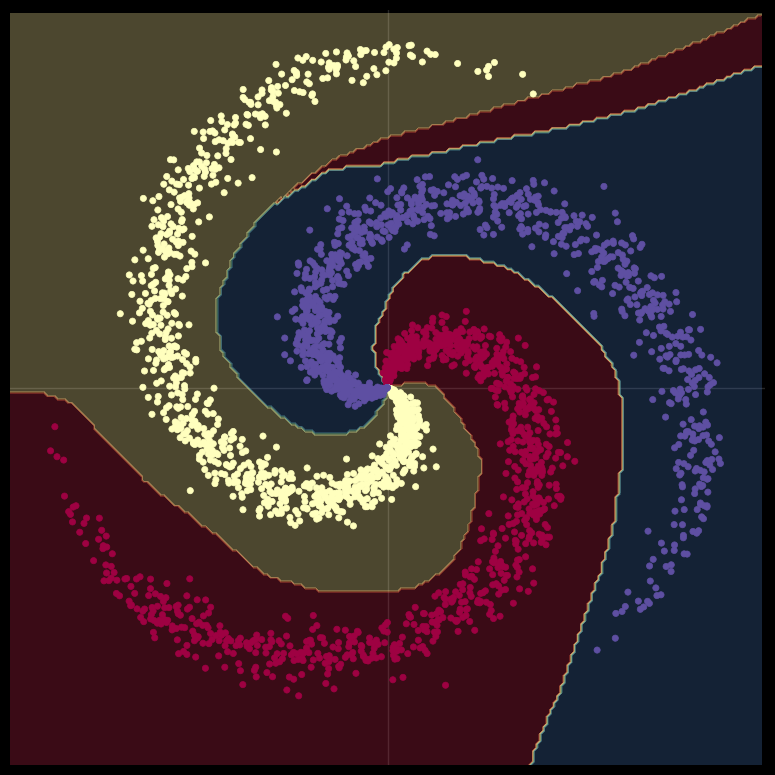

In [31]:
# Plot trained model
print(model)
plot_model(X, y, model)

In [32]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([  4126.8584, -13487.5195,  13472.5752], grad_fn=<AddBackward0>)
tensor([ 1331.3008,  6611.2979, -4857.8413], grad_fn=<AddBackward0>)
tensor([  1.5507,  29.0817, -17.6992], grad_fn=<AddBackward0>)


#### 20 Layer + ReLU

In [33]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 20 Layers
model = nn.Sequential(
    nn.Linear(D, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer, 50000)

[EPOCH]: 49999, [LOSS]: 1.098614, [ACCURACY]: 0.333


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): ReLU()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): ReLU()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): ReLU()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): ReLU()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): ReLU()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): ReLU()
  (20): Linear(in_features=100, out_features=100, bias=True)
  (21): ReLU()
  (22): Linear(in_features=100, out_features=100, bias=True)
  (23): ReLU()
  (24): Linear(in_features=100, out_features=100, bias=True)
  (25): ReLU()
  (26): Line

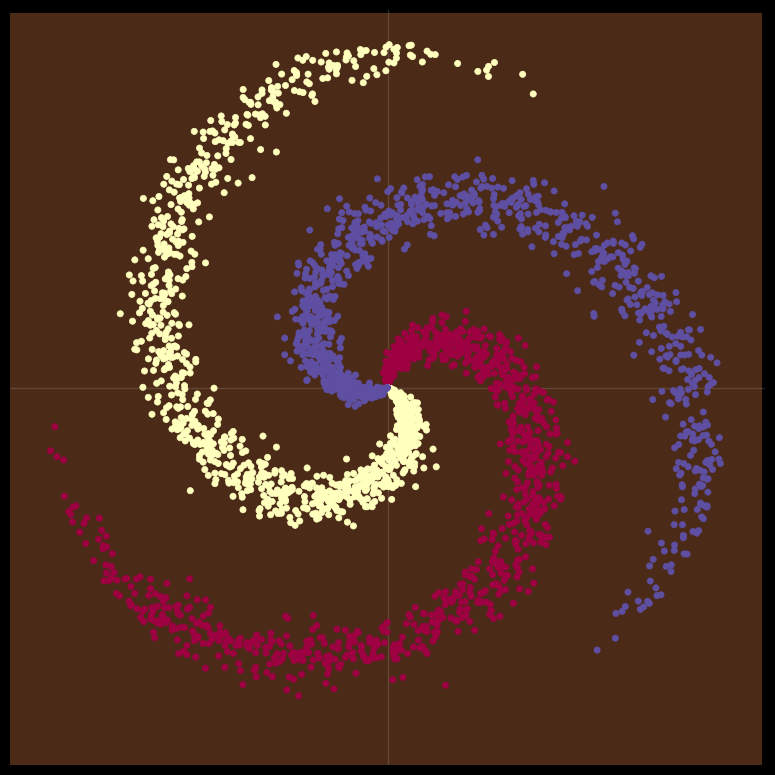

In [34]:
# Plot trained model
print(model)
plot_model(X, y, model)

With more than 13 layers (with 100 neurons and ReLU) the prediction doesn't converge (accuracy doesn't reach the 0.99). 

@David: the ReLU filter negative points. It is very probably from a layer to the next one (initial random weights) it ends in the negative part. That implies value 0. With more layers easier it's obtain a value 0. In this way, all the predictions goes to the same point (0,0) independently the class. There are so many layers that backpropagation can't separate this points only modifying some values of the weights. The effect of the backpropagation can't reach the first layers. 

In [35]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([ 8.6457e-06, -1.6673e-05, -7.8659e-05], grad_fn=<AddBackward0>)
tensor([ 8.6457e-06, -1.6673e-05, -7.8659e-05], grad_fn=<AddBackward0>)
tensor([ 8.6457e-06, -1.6673e-05, -7.8659e-05], grad_fn=<AddBackward0>)


What happen if we use `Tanh` as non-linear function?

#### 20 Layer + Tanh

In [36]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 20 Layers
model = nn.Sequential(
    nn.Linear(D, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 0.004386, [ACCURACY]: 0.999


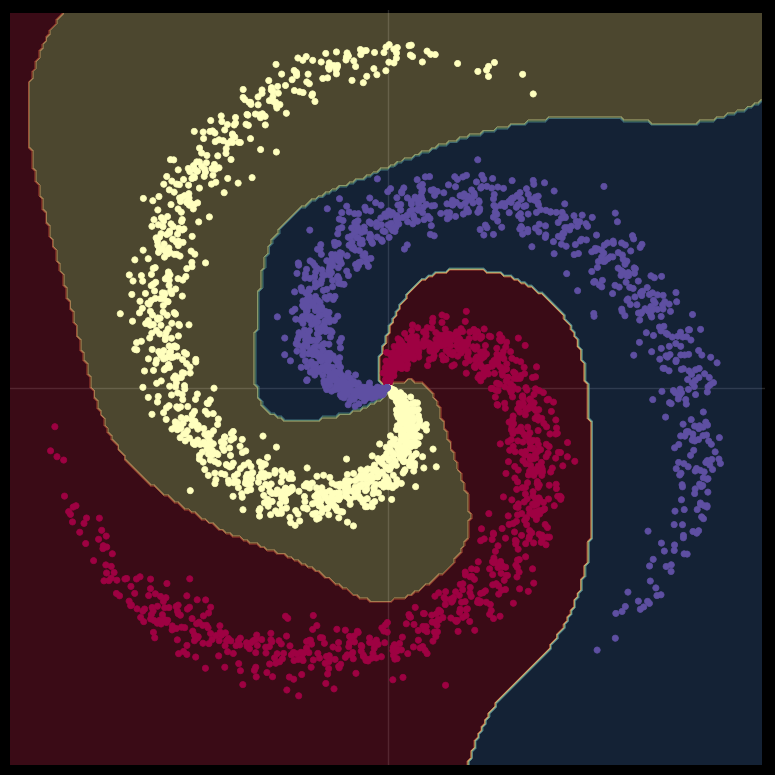

In [37]:
# Plot trained model
plot_model(X, y, model)

@David: as we see in the notebook `02-space_stretching` the `Tanh` function limits the values out of the thresholds  to 1 and -1. It makes easier the backpropagation effect. It can separate better the points because no all of them are in the same point (0,0) like using `ReLU`. It is, with all this layers its very likely that the predictions are in the 1 and -1 points but it is easier separate them with backpropagation.

In [38]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([-3.1179, -2.2352,  4.7815], grad_fn=<AddBackward0>)
tensor([ 4.9824, -0.4711, -3.5223], grad_fn=<AddBackward0>)
tensor([-5.2326,  5.4216,  0.0705], grad_fn=<AddBackward0>)


If we added more layers, probably, we need more epochs to converge. No?

#### 40 Layer + Tanh

In [39]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 40 Layers
model = nn.Sequential(
    nn.Linear(D, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer, 30000)

[EPOCH]: 29999, [LOSS]: 1.098612, [ACCURACY]: 0.333


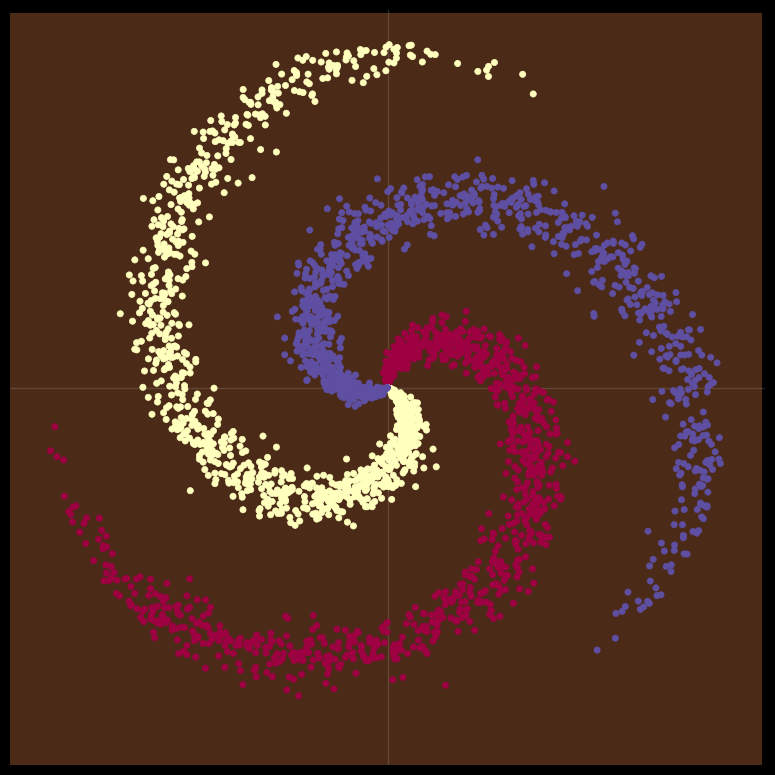

In [40]:
# Plot trained model
plot_model(X, y, model)

Nop. If we added more and more layers the probability that the points are out of the threshold are so big that it is imposible to separate them. We think, at the end, all the predictions are in 4 points (1,1) (1,-1) (-1,1) (-1,-1) independly of the label. It makes that the backpropagation can't affect appropriately to the weights to separate each point.  

In [41]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([-6.5019e-05, -8.4729e-05, -8.4155e-05], grad_fn=<AddBackward0>)
tensor([-6.5019e-05, -8.4729e-05, -8.4155e-05], grad_fn=<AddBackward0>)
tensor([-6.5019e-05, -8.4729e-05, -8.4155e-05], grad_fn=<AddBackward0>)


### Inverse triangle

Networks with not a few neurons at the first layers that are increasing layer by layer. This creates a network narrow at the begining and broad at the end.

#### 13 Layers + ReLU

In [47]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 13 Layers
model = nn.Sequential(
    nn.Linear(D, 10),
    nn.ReLU(),
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 30),
    nn.ReLU(),
    nn.Linear(30, 40),
    nn.ReLU(),
    nn.Linear(40, 50),
    nn.ReLU(),
    nn.Linear(50, 60),
    nn.ReLU(),
    nn.Linear(60, 70),
    nn.ReLU(),
    nn.Linear(70, 80),
    nn.ReLU(),
    nn.Linear(80, 90),
    nn.ReLU(),
    nn.Linear(90, 100),
    nn.ReLU(),
    nn.Linear(100, 110),
    nn.ReLU(),
    nn.Linear(110, 120),
    nn.ReLU(),
    nn.Linear(120, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 0.105068, [ACCURACY]: 0.970


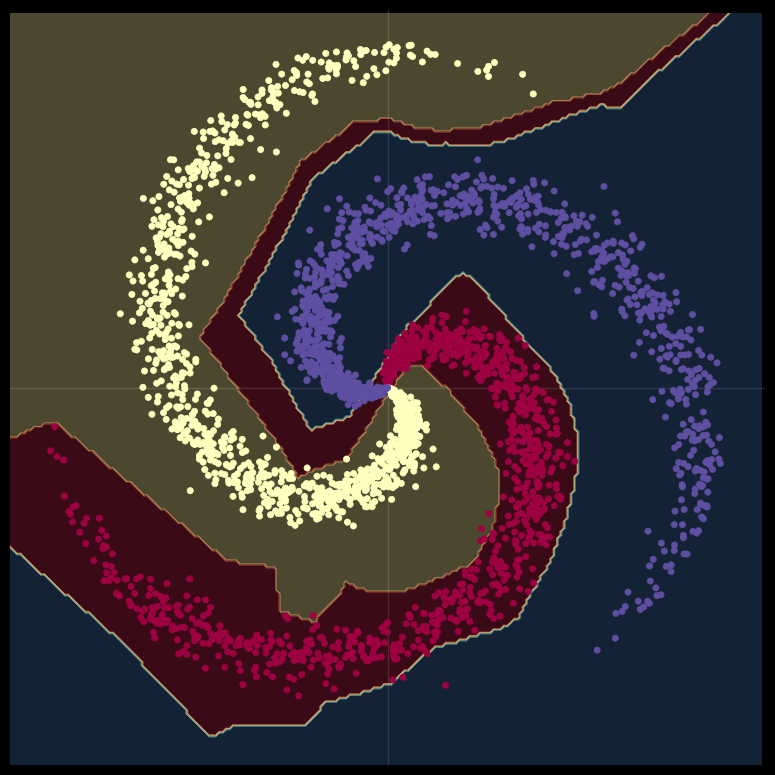

In [48]:
# Plot trained model
plot_model(X, y, model)

In [49]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([ 263.2557, -531.9229,  540.1207], grad_fn=<AddBackward0>)
tensor([  51.2081, -103.3491,  104.7519], grad_fn=<AddBackward0>)
tensor([-2.5102,  6.9548, -4.9928], grad_fn=<AddBackward0>)


#### 20 layers + ReLU

In [50]:
learning_rate = 1e-3
lambda_l2 = 1e-5

# 13 Layers
model = nn.Sequential(
    nn.Linear(D, 10),
    nn.ReLU(),
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 30),
    nn.ReLU(),
    nn.Linear(30, 40),
    nn.ReLU(),
    nn.Linear(40, 50),
    nn.ReLU(),
    nn.Linear(50, 60),
    nn.ReLU(),
    nn.Linear(60, 70),
    nn.ReLU(),
    nn.Linear(70, 80),
    nn.ReLU(),
    nn.Linear(80, 90),
    nn.ReLU(),
    nn.Linear(90, 100),
    nn.ReLU(),
    nn.Linear(100, 110),
    nn.ReLU(),
    nn.Linear(110, 120),
    nn.ReLU(),
    nn.Linear(120, 130),
    nn.ReLU(),
    nn.Linear(130, 140),
    nn.ReLU(),
    nn.Linear(140, 150),
    nn.ReLU(),
    nn.Linear(150, 160),
    nn.ReLU(),
    nn.Linear(160, 170),
    nn.ReLU(),
    nn.Linear(170, 180),
    nn.ReLU(),
    nn.Linear(180, 190),
    nn.ReLU(),
    nn.Linear(190, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 1.098611, [ACCURACY]: 0.333


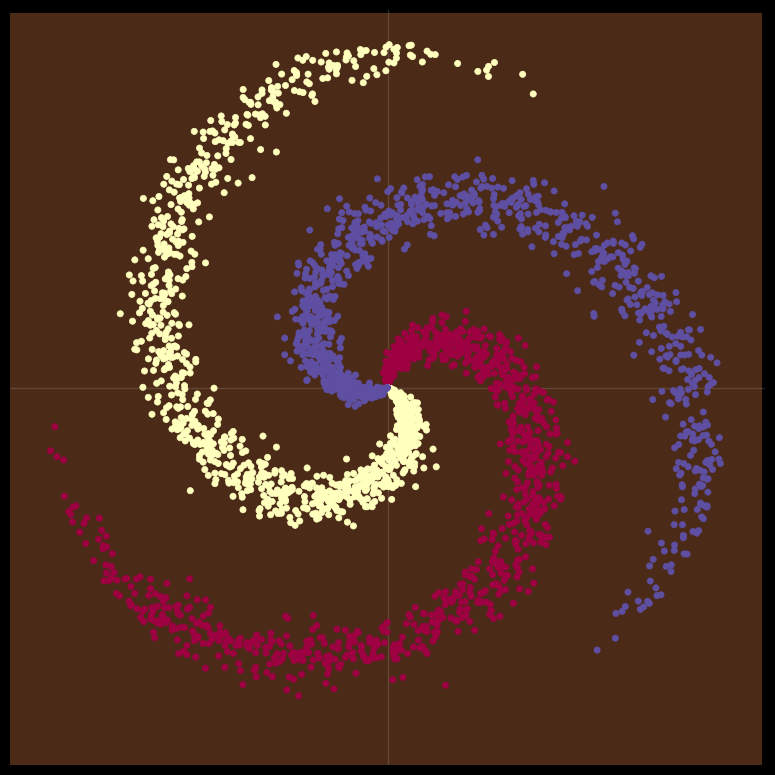

In [51]:
plot_model(X, y, model)

Each layer increase the number of dimensions. It causes that the probability of fall in a direction that is filter by the `ReLU` function is very high. It causes that the predictions goes to the (0,0) point. 

In [52]:
tensor_ex = torch.tensor([100., -100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([-100., 100.])
print(model(tensor_ex))

tensor_ex = torch.tensor([0.01, 0.9])
print(model(tensor_ex))

tensor([-0.0239, -0.0239, -0.0239], grad_fn=<AddBackward0>)
tensor([-0.0239, -0.0239, -0.0239], grad_fn=<AddBackward0>)
tensor([-0.0239, -0.0239, -0.0239], grad_fn=<AddBackward0>)


### Triangle

Networks with few neurons at the first layers that are decreasing layer by layer. This creates a network broad at the begining and narrow at the end.

#### 20 layers + ReLU

In [58]:
 learning_rate = 1e-3
lambda_l2 = 1e-5

# 13 Layers
model = nn.Sequential(
    nn.Linear(D, 200),
    nn.ReLU(),
    nn.Linear(200, 190),
    nn.ReLU(),
    nn.Linear(190, 180),
    nn.ReLU(),
    nn.Linear(180, 170),
    nn.ReLU(),
    nn.Linear(170, 160),
    nn.ReLU(),
    nn.Linear(160, 150),
    nn.ReLU(),
    nn.Linear(150, 140),
    nn.ReLU(),
    nn.Linear(140, 130),
    nn.ReLU(),
    nn.Linear(130, 120),
    nn.ReLU(),
    nn.Linear(120, 110),
    nn.ReLU(),
    nn.Linear(110, 100),
    nn.ReLU(),
    nn.Linear(100, 90),
    nn.ReLU(),
    nn.Linear(90, 80),
    nn.ReLU(),
    nn.Linear(80, 70),
    nn.ReLU(),
    nn.Linear(70, 60),
    nn.ReLU(),
    nn.Linear(60, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

train_model(X, model, criterion, optimizer)

[EPOCH]: 999, [LOSS]: 1.098612, [ACCURACY]: 0.333


It isn't work either! 